This is a demo file for using trader functions


In [355]:
#import latex

In [356]:
import yfinance as yf
import trader
import numpy as np


In [357]:
# define pair
# pair =  ['DBGR', 'HEWG']
pairs = [['BZQ', 'ERY'],['CATH', 'SPLG'],['HIPS','TPYP'],['LABD', 'REW'],['CATH', 'SPLG']]
pair = pairs[2]

# load price info (historical+present together)
startpoints = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01"]
endpoints = ["2017-12-31","2019-1-1","2019-12-31","2020-12-30","2021-12-31"]
start_of_presents = ["2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01"]
startpoint = startpoints[2]
endpoint = endpoints[2]
prices_all = yf.download(pair,start=startpoint, end=endpoint)["Adj Close"].dropna()

start_of_present = start_of_presents[2]

[*********************100%***********************]  2 of 2 completed


(<Figure size 1152x720 with 2 Axes>,
 (<AxesSubplot:title={'center':'Y and beta*X'}>,
  <AxesSubplot:title={'center':'spread = Y - beta*X'}>))

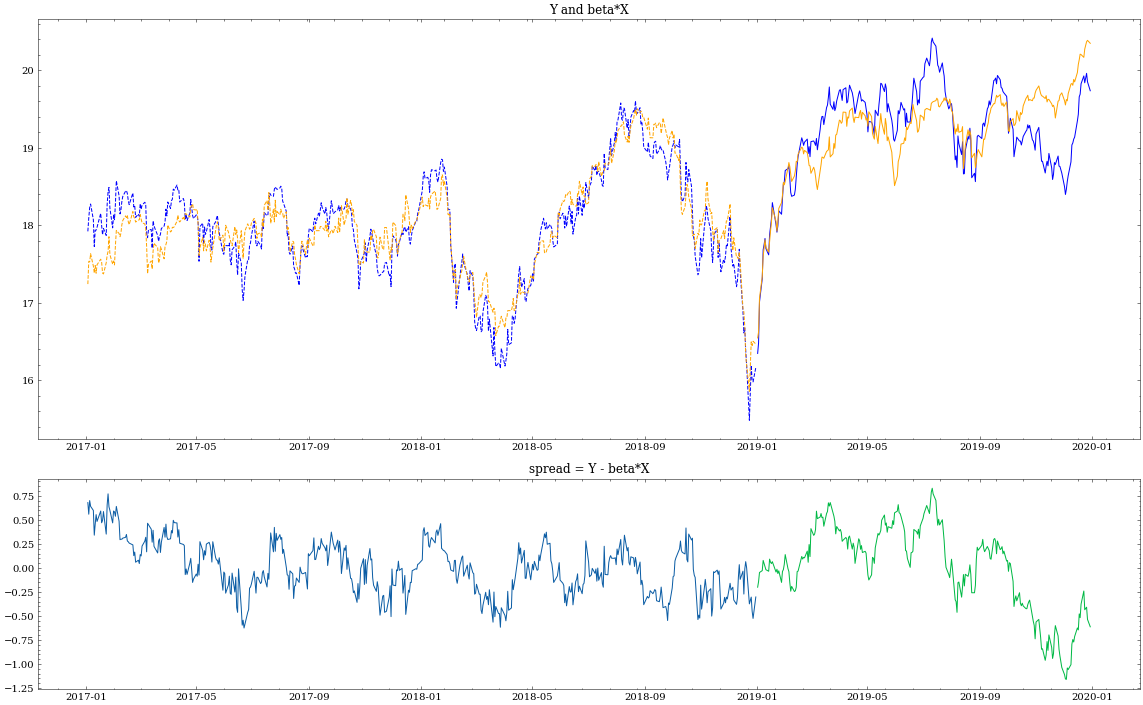

In [358]:
trader.plot_pair_and_spread(prices_all, start_of_present)

DEMO: Copula Method

In [359]:
"""
generate_signals_dynamic function will return the 1yr present price dataframe and the corresponding trading signal
threshold: for copula trigger
freq: frequency for updating the historical data
        1 - yearly
        4 - quartely
        12 - monthly
rolling: bollean indercator for rolling basis
        example: freq = 4, training = 2018-2019, testing = 2020
        True: [2018Q1-2019Q4, 2020Q1], [2018Q2-2020Q1, 2020Q2], [2018Q3-2020Q2, 2020Q3], [2018Q4-2020Q3, 2020Q4]
        False: [2018Q1-2019Q4, 2020Q1], [2018Q1-2020Q1, 2020Q2], [2018Q1-2020Q2, 2020Q3], [2018Q1-2020Q3, 2020Q4]
"""

prices_present, signals_copula = trader.generate_signals_dynamic(prices=prices_all, threshold=0.2, freq=1, rolling=True)

historical 0 501
present 502 752
clayton is optimal for HIPS and TPYP
optimal copula used:  clayton
clayton is optimal for HIPS and TPYP


In [360]:
trader.calculate_return(prices_present,0,signals_copula,"cumulative1")["unrealized_pnl_cum"]-trader.calculate_return(prices_present,0,signals_copula,"cumulative1")["realized_pnl_cum"]

2019-01-02         NaN
2019-01-03    0.000000
2019-01-04    0.000000
2019-01-07    0.000000
2019-01-08    0.000000
                ...   
2019-12-23    0.078696
2019-12-24    0.150690
2019-12-26    0.139369
2019-12-27    0.192047
2019-12-30    0.000000
Length: 251, dtype: float64

0.2647484023932263
0.1282147709131779


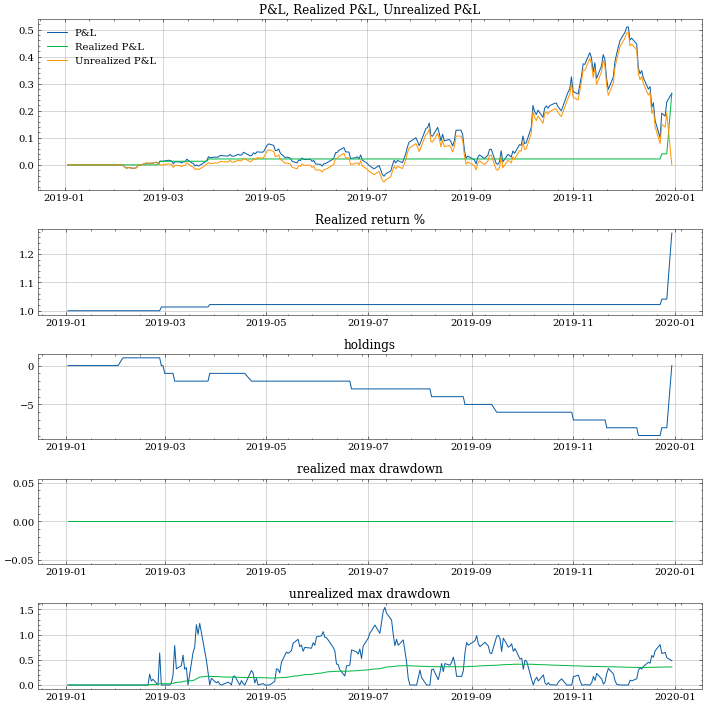

In [361]:
return_df1 = trader.calculate_return(prices_present,0,signals_copula,"cumulative1")
trader.plot_summary(return_df1)


print(return_df1["unrealized_pnl_cum"][-1])
print(return_df1["unrealized_pnl_cum"].std())

0.14840608126118737
0.10485416715044484


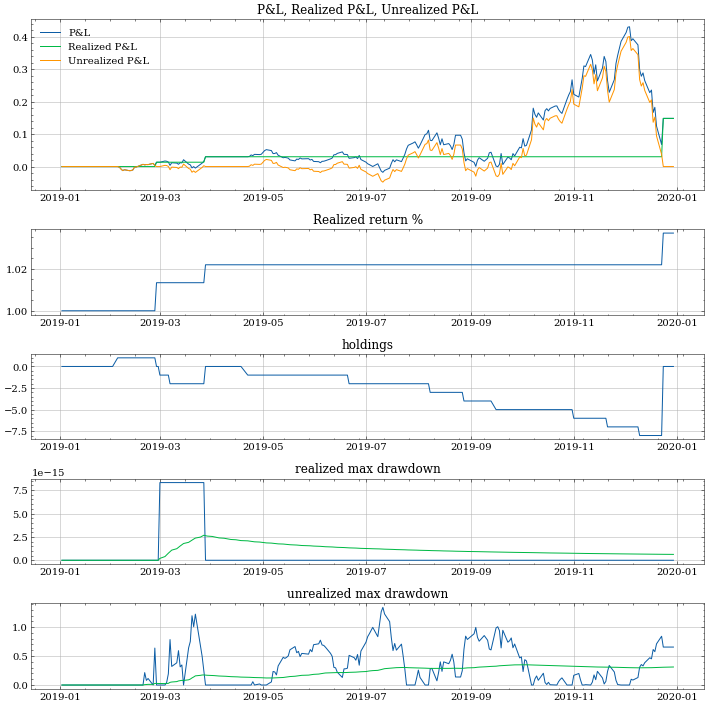

In [364]:
return_df2 = trader.calculate_return(prices_present,0,signals_copula,"cumulative2")
trader.plot_summary(return_df2)

print(return_df2["unrealized_pnl_cum"][-1])
print(return_df2["unrealized_pnl_cum"].std())

DEMO: Mispricing Method

[*********************100%***********************]  2 of 2 completed
-0.0352932936526954
-0.0352932936526954


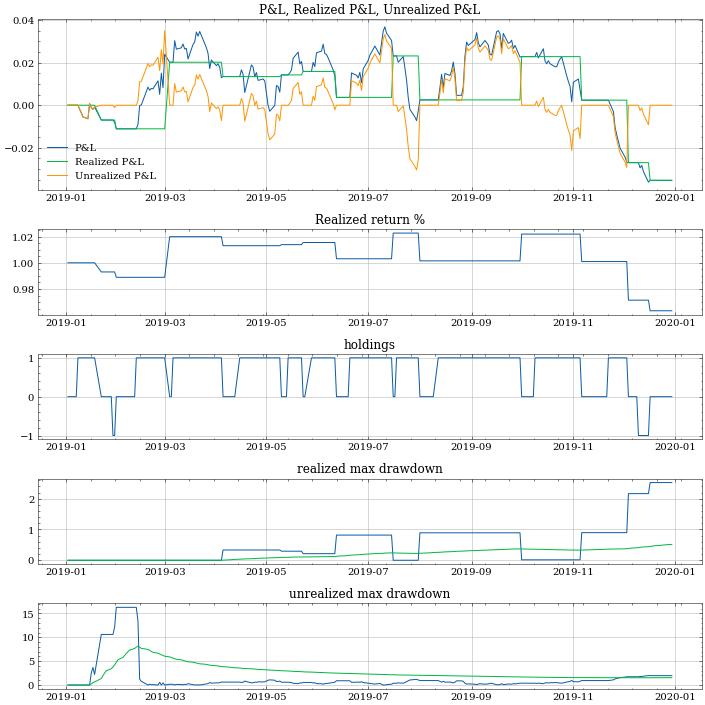

In [363]:
import pandas as pd

pair_mispricing = pair
present = yf.download(pair_mispricing,start=start_of_present, end=endpoint)["Adj Close"]

# NEED UPDATE: call signal generator function for mispricing 
signals_mispricing = pd.read_csv('mis_pricing_signal.txt', index_col=0)
signals_mispricing.index = present.index

return_df3 = trader.calculate_return(present,0,signals_mispricing["position"],"mispricing_method")
trader.plot_summary(return_df3)

print(return_df3["unrealized_pnl_cum"][-1])
print(return_df3["unrealized_pnl_cum"].std())